In [7]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [8]:
# Loading the dataset
file_path = "wdbc.data"
columns = ['ID', 'Diagnosis'] + [f'feature_{i}' for i in range(1, 31)]
data = pd.read_csv(file_path, header=None, names=columns)

# Data Preprocessing
data = data.drop(columns=['ID'])
data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': 0})
X = data.drop(columns=['Diagnosis'])
y = data['Diagnosis']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)





In [9]:
# Training and Evaluating SVM Classifier
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
svm_y_pred = svm_model.predict(X_test)

svm_accuracy = accuracy_score(y_test, svm_y_pred)
svm_conf_matrix = confusion_matrix(y_test, svm_y_pred)
svm_class_report = classification_report(y_test, svm_y_pred)



In [10]:
print(f'SVM Classifier Accuracy: {svm_accuracy:.2f}')
print('SVM Confusion Matrix:\n', svm_conf_matrix)
print('SVM Classification Report:\n', svm_class_report)



SVM Classifier Accuracy: 0.95
SVM Confusion Matrix:
 [[71  0]
 [ 6 37]]
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        71
           1       1.00      0.86      0.92        43

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



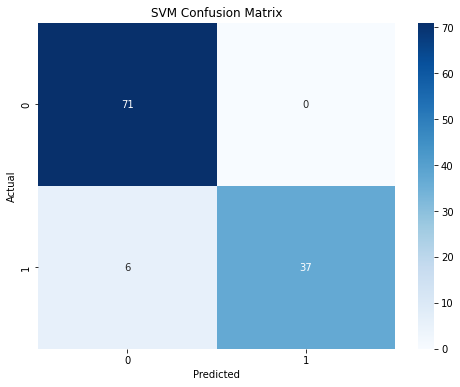

In [11]:
# Plotting SVM Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(svm_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix')
plt.show()